## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
#import and look at poll data again
poll = pd.read_csv('poll.csv')
poll.vote.value_counts(normalize=True)
# null hyp is that green wins since brown has higher proportion votes.

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [6]:
# function to simulate sample of 1000
#compare uniformly dist fraction with brown fraction
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [13]:
# sampling dist of counted votes, repeated many times, in df dist
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

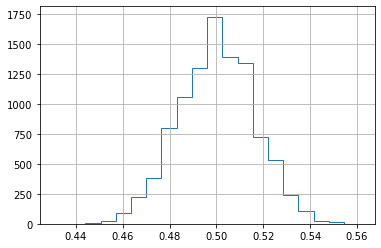

In [8]:
# hist of sampling dist, 0.511 is not an extreme value
dist.Brown.hist(histtype='step',bins=20)

In [9]:
# corresponding p value, 24.6% not enough to reject that green wins
p= 100 - scipy.stats.percentileofscore(dist.Brown,0.511)
p

24.564999999999998

In [10]:
#import and look at larger poll data and counts
largepoll = pd.read_csv('poll-larger.csv')
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [14]:
# sampling dist of .50 for Green with 10000 samples and 1000 repetitions
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

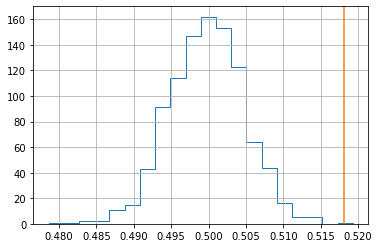

In [12]:
# distribution of Green samples
dist.Green.hist(histtype='step',bins=20)
#overlay the the mean value, this mean is extreme so p value would be very significant
pp.axvline(0.5181,c='C1')